#Fourth Assignment - Network

## Introduction

In this fourth assignment we are going to analyze a small network. The data was collected from Network Repository, in this [link](http://networkrepository.com/bn-mouse-visual-cortex-1.php). We are using python3.x in a Jupyter Notebook, in the end the *.py* code will be provided.

Like any program in python we start by importing the necessary packages.

In [188]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
from collections import Counter
import seaborn; seaborn.set()

%matplotlib inline 

I was having some problem to open the data file. So I imported my network manually as a python list, as showed below

In [189]:
data  = [[1,14], [2,17], [2,18], [2,19],[2,20], [2,21], [2,28],[3,16],[3,17], [3,18], [5,1],
         [5,13], [5,15], [5,16], [5,28],[6,15], [7,3],  [7,20],[7,21],[7,22], [8,22], [9,0],
         [9,16], [9,19], [9,22], [9,23],[9,24], [9,25], [9,26],[9,28],[10,13],[10,22],[10,24],
         [10,25],[10,26],[10,27],[11,0],[11,23],[11,27],[12,0],[12,1],[12,4], [12,14],[12,28]]

Visualizing our network using the NetworkX library

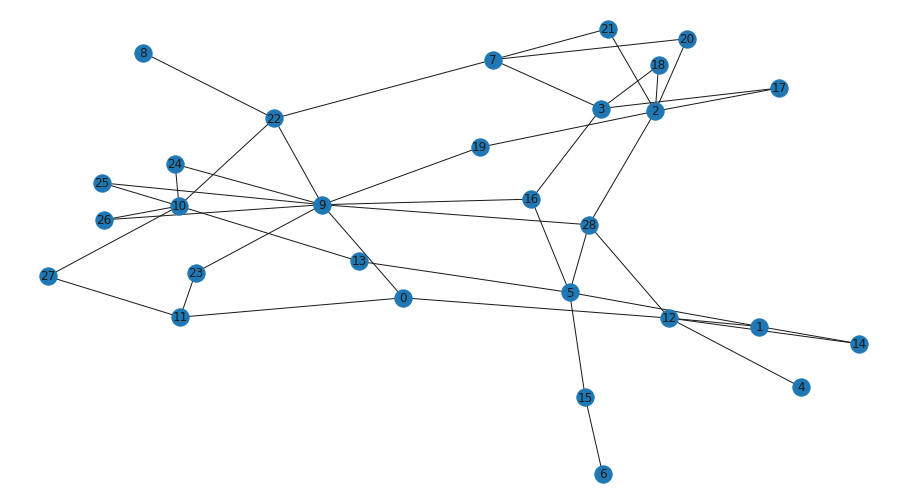

In [231]:
G = nx.Graph()

G.add_edges_from(data)

fig, ax = plt.subplots(figsize=(16, 9))

nx.draw(G, with_labels=True)
plt.show()

Retrieving some information

In [191]:
G.number_of_nodes()

29

In [192]:
G.number_of_edges()

44

##Clustering

We are interested in find our local and global cluster coeficients. The local coeficient is given by [[1]](https://en.wikipedia.org/wiki/Clustering_coefficient)

\begin{aligned}
    C_i = \frac{2N_c}{N_n(N_n - 1)}
\end{aligned}

where $i$ is the index of the node, $N_c$ is the number of all connections (edges) and $N_n$ is number of possible connections between neighbors (nodes). It represents how close its neighbours are to being a network. We can also define our global cluster coeficient. Which is given by the average of our local cluster coeficients

\begin{aligned}
    \bar{C} = \frac{1}{n} \sum_{i=1}^{n}C_i
\end{aligned}

where $n$ is the total number of nodes and $C_i$ is the local cluster coeficient, as given above.

Coding functions for both equations

In [193]:
def local_clustering(G, nodes=None):
    td_iter = _triangles_and_degree_iter(G, nodes)
    clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for v, d, t, _ in td_iter}
    if nodes in G:
        return clusterc[nodes]
    return clusterc

In [194]:
def global_clustering(localc):
    c1 = 0
    c2 = 0

    for name, dict_ in localc.items():
        c1 += dict_
        c2 +=1

    return c1/c2

Then, evaluating the local cluster coeficient of our network

In [195]:
lc = local_clustering(G)

for name, dict_ in lc.items():
    if dict_ != 0:
        print("Node: ", name, "\n C_i", dict_,"\n")

Node:  1 
 C_i 0.3333333333333333 

Node:  14 
 C_i 1.0 

Node:  12 
 C_i 0.1 



and, the global cluster coeficient

In [196]:
gc = global_clustering(lc)

print("Global Cluster Coeficient:", gc)

Global Cluster Coeficient: 0.04942528735632184


We find that, of 29 nodes only three have $C_i \neq 0$. The nodes are 1, 12 and 14. We also find that our global cluster coeficient is

\begin{aligned}
    \bar{C} = 0.049
\end{aligned}

##Average Shortest Distance

We can define the Average Shortest Distance of our Network, which is given by [[2]](https://en.wikipedia.org/wiki/Average_path_length).

\begin{aligned}
    l_g = \frac{1}{n(n - 1)}\sum_{i \neq j} d(v_1,v_2)
\end{aligned}

where $n$ is the number of edges and $d(v_1,v_2)$ is the distance between two nodes. We use $d(v_1,v_2) = 0$ if they have no connection. The average shortest distance distinguishes an easily negotiable network from one, which is complicated and inefficient, with a shorter average path length being more desirable.

Defining a code function for our $l_g$

In [197]:
def average_shortest_distance(G):
    n = len(G)
    s = sum(l for u in G for l in nx.single_source_shortest_path_length(G, u).values())
    return s / (n *(n-1))

evaluating

In [198]:
print(average_shortest_distance(G))

2.9408866995073892


We find that our Average Shortest Distance is

\begin{aligned}
    l_g = 2.941
\end{aligned}

## Centrality

Centrality is how much connections a node have [[3]](https://en.wikipedia.org/wiki/Centrality). We convert those numbers into a 0-1 scale. Here is how we can do this in coding

In [199]:
def centrality(G):
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.degree()}
    return centrality

evaluating for each node

In [201]:
cnt = centrality(G)
cnt

{0: 0.10714285714285714,
 1: 0.10714285714285714,
 2: 0.21428571428571427,
 3: 0.14285714285714285,
 4: 0.03571428571428571,
 5: 0.17857142857142855,
 6: 0.03571428571428571,
 7: 0.14285714285714285,
 8: 0.03571428571428571,
 9: 0.3214285714285714,
 10: 0.21428571428571427,
 11: 0.10714285714285714,
 12: 0.17857142857142855,
 13: 0.07142857142857142,
 14: 0.07142857142857142,
 15: 0.07142857142857142,
 16: 0.10714285714285714,
 17: 0.07142857142857142,
 18: 0.07142857142857142,
 19: 0.07142857142857142,
 20: 0.07142857142857142,
 21: 0.07142857142857142,
 22: 0.14285714285714285,
 23: 0.07142857142857142,
 24: 0.07142857142857142,
 25: 0.07142857142857142,
 26: 0.07142857142857142,
 27: 0.07142857142857142,
 28: 0.14285714285714285}

##Assortativity


The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. Negative values indicate relationships between nodes of different degree, while positive values of $r$ reveals a correlation between nodes of similar degree. $r \in [-1:1]$. When$r = −1$ the network is completely disassortative, when $r = 1$ the network is said to have perfect assortative mixing patterns and when $r = 0$ the network is non-assortative. The assortativity coefficient is given by [[4]](https://en.wikipedia.org/wiki/Assortativity)

\begin{aligned}
    r = \frac{\sum_{i,j} ij(e_{ij} - q_i q_j)}{\sigma^2_q}
\end{aligned}

The term $q_{i}$ is the distribution of the remaining degree, $q_i$ is the degree distribution and $e_{ij}$ refers to the joint probability distribution. For this one I could not make a code, so I used the NetworkX function.

In [229]:
r = nx.degree_assortativity_coefficient(G)

print(r)

-0.4708960803161382


We obtain that

\begin{aligned}
    r = -0.471
\end{aligned}

which is a negative value, meaning that our network is likely to be disassortative.

##Last Comments

I really enjoyed this class. I learned a lot and I worked a lot. I would like to say thanks to Prof. Carlo Requião and to my classmates.

If you want to download the *.py* or the *.ipynb* there is some link below.


[Python Code](http://lief.if.ufrgs.br/~pedhmendes/cadeiras/econofisica/fourth_assignment.py)

[Jupyter Notebook Code](http://lief.if.ufrgs.br/~pedhmendes/cadeiras/econofisica/fourth_assignment.ipynb)